In [4]:
import pandas as pd
import geopandas as gpd
import numpy as np
import math #to make sure mathematical operation like logarithm
import matplotlib.pylab as plt
#make sure python plots are embedded in the notebook
%matplotlib inline

In [5]:
#upload a dataframe for residential location and demographic decomposition of urban population according to LEHD
LEHDR=pd.read_csv("SMdata/LEHD-resident.csv", index_col=0)

In [6]:
LEHDW=pd.read_csv("SMdata/LEHD-work.csv", index_col=0)

In [7]:
LEHDR.head()

,total,male,female,age_under_29,age_30_54,age_55_over,white,black,asian,others,two_or_more,less_high_school,high_school,college,bachelor
tz,,,,,,,,,,,,,,,
2,198,108,90,67,70,61,104,45,29,8,12,24,31,38,38
3,11398,5393,6005,2551,6346,2501,5990,4106,973,120,209,1414,2035,2666,2732
4,12318,6125,6193,3731,6421,2166,8259,2063,1591,122,283,1375,1859,2392,2961
5,10751,5546,5205,2154,6057,2540,9513,464,656,36,82,792,1626,2466,3713
6,6729,3287,3442,1409,3692,1628,5093,677,818,53,88,582,1052,1538,2148


data decomposition as taxi zone tz

In [8]:
LEHDW.head()

,total,male,female,age_under_29,age_30_54,age_55_over,white,black,asian,others,two_or_more,less_high_school,high_school,college,bachelor
tz,,,,,,,,,,,,,,,
3,4989,1863,3126,892,2774,1323,2513,1968,386,39,83,637,941,1287,1232
4,2717,1310,1407,688,1506,523,1884,512,251,24,46,350,434,599,646
5,1191,658,533,319,631,241,960,139,87,0,5,96,181,257,338
6,2495,1070,1425,491,1315,689,1907,330,206,20,32,167,453,540,844
7,17223,8980,8243,4006,9611,3606,12137,2789,1910,143,244,2238,3083,3795,4101


In [9]:
LEHDR.describe()

,total,male,female,age_under_29,age_30_54,age_55_over,white,black,asian,others,two_or_more,less_high_school,high_school,college,bachelor
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,13672.601533,6609.865900,7062.735632,3154.651341,7643.739464,2874.210728,8394.957854,3295.226054,1597.501916,128.325670,256.590038,1568.632184,2247.517241,2988.498084,3713.302682
std,9680.577392,4628.773452,5093.221366,2366.329312,5420.540564,2085.523846,6190.873828,4437.941903,1859.520212,111.811127,200.034008,1281.468218,1676.119109,2161.019226,2661.564273
min,40.000000,16.000000,24.000000,9.000000,16.000000,15.000000,26.000000,6.000000,5.000000,0.000000,1.000000,4.000000,6.000000,13.000000,8.000000
25%,7847.000000,3691.000000,3944.000000,1596.000000,4301.000000,1346.000000,3884.000000,566.000000,479.000000,47.000000,108.000000,601.000000,1121.000000,1620.000000,1877.000000
50%,12091.000000,5887.000000,6332.000000,2793.000000,6925.000000,2585.000000,7648.000000,1522.000000,1053.000000,102.000000,223.000000,1347.000000,1934.000000,2645.000000,3419.000000
75%,18811.000000,8920.000000,9788.000000,4229.000000,10608.000000,3909.000000,11525.000000,4184.000000,1895.000000,179.000000,349.000000,2246.000000,2979.000000,4141.000000,5069.000000
max,48629.000000,21874.000000,26755.000000,13105.000000,26650.000000,11111.000000,32818.000000,24998.000000,11989.000000,730.000000,1163.000000,6105.000000,8819.000000,11312.000000,15810.000000


In [10]:
LEHDW.describe()

,total,male,female,age_under_29,age_30_54,age_55_over,white,black,asian,others,two_or_more,less_high_school,high_school,college,bachelor
count,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000
mean,16186.665370,8067.136187,8119.529183,3530.342412,9227.630350,3428.692607,10431.225681,3471.256809,1859.914397,136.482490,287.785992,1696.723735,2552.630350,3534.727626,4872.241245
std,25772.339555,13537.685598,12459.126010,5846.890848,15176.841009,4970.647290,17687.293821,4787.477917,3234.556316,205.964634,477.092747,2115.325209,3514.101766,5267.232367,9452.361730
min,5.000000,4.000000,1.000000,0.000000,3.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,4084.000000,1978.000000,2133.000000,847.000000,2339.000000,996.000000,2513.000000,970.000000,355.000000,33.000000,67.000000,511.000000,734.000000,993.000000,1050.000000
50%,8263.000000,3996.000000,4302.000000,1692.000000,4610.000000,1908.000000,5171.000000,2120.000000,763.000000,70.000000,137.000000,1010.000000,1468.000000,1978.000000,2052.000000
75%,16136.000000,7800.000000,8243.000000,3494.000000,8879.000000,3678.000000,10435.000000,3908.000000,1856.000000,142.000000,275.000000,1983.000000,2810.000000,3708.000000,4189.000000
max,197140.000000,107473.000000,91392.000000,44077.000000,117884.000000,39189.000000,142519.000000,44468.000000,25756.000000,1446.000000,3477.000000,14126.000000,25250.000000,41191.000000,79399.000000


In [11]:
#merge the two dataframeskeeping only totals: perform inner merge on index
#as column names are largelyrepeated, introduce a suffix for the ones from the second dataframe
Pdata=LEHDR[['total']].merge(LEHDW[['total']], on=None, left_index=True, right_index=True, how='inner', suffixes=('','W'))
Pdata.rename(columns={'total':'totalR'}, inplace=True)

In [12]:
Pdata.head()

,totalR,totalW
tz,,
3,11398,4989
4,12318,2717
5,10751,1191
6,6729,2495
7,43048,17223


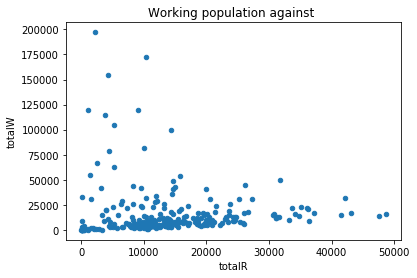

In [13]:
Pdata.plot(x='totalR', y='totalW', kind='scatter', title='Working population against ')

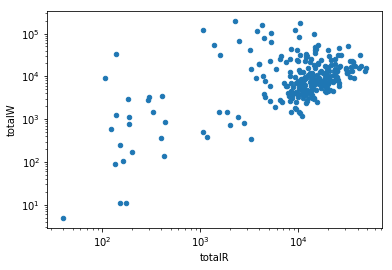

In [14]:
Pdata.plot(x='totalR',y='totalW', kind='scatter',logx=True,logy=True)

In [16]:
np.corrcoef(Pdata.totalR, Pdata.totalW)

array([[ 1.        , -0.04078555],
       [-0.04078555,  1.        ]])

In [17]:
np.corrcoef(np.log(Pdata.totalR), np.log(Pdata.totalW))

array([[1.        , 0.55420769],
       [0.55420769, 1.        ]])

In [18]:
print(np.corrcoef(LEHDR.male,LEHDR.female)[0][1], np.corrcoef(LEHDW.male, LEHDW.female)[0][1])

0.9829566903669411 0.9655514199256813


In [19]:
#reading shapefiles of NYC taxi zones
tsz=gpd.read_file('taxi_zones/taxi_zones.shp')

In [21]:
tsz.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ..."


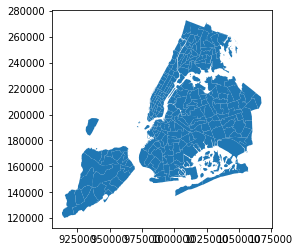

In [23]:
tsz.plot()

C:\Users\ps336\Anaconda3\lib\site-packages\geopandas\plotting.py:389: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


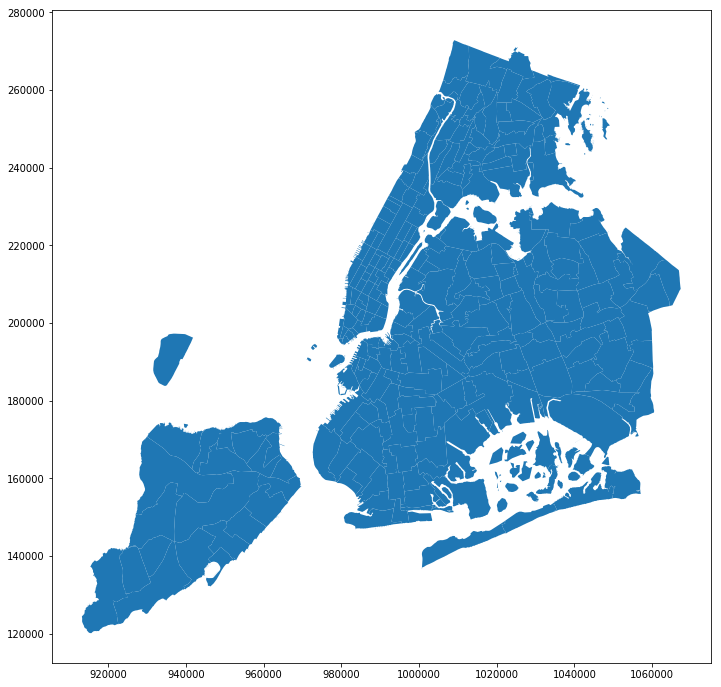

In [24]:
f, ax = plt.subplots(1, figsize=(12, 12))
tsz.plot(axes=ax)

In [28]:
Residential={tz:Pdata.totalR[tz] for tz in Pdata.index}
Working= {tz:Pdata.totalW[tz] for tz in Pdata.index}

In [61]:
tsz.head()
tsz['ResidentialPop']=tsz.LocationID.map(Residential)
tsz['WorkingPop']=tsz.LocationID.map(Working)

In [63]:
tsz.head()
tsz.dropna(inplace=True)
tsz.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,ResidentialPop,WorkingPop
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,...",11398.0,4989.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,...",12318.0,2717.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ...",10751.0,1191.0
5,6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,"POLYGON ((966568.7466657609 158679.854687795, ...",6729.0,2495.0
6,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.217962816 218919.6406951398,...",43048.0,17223.0


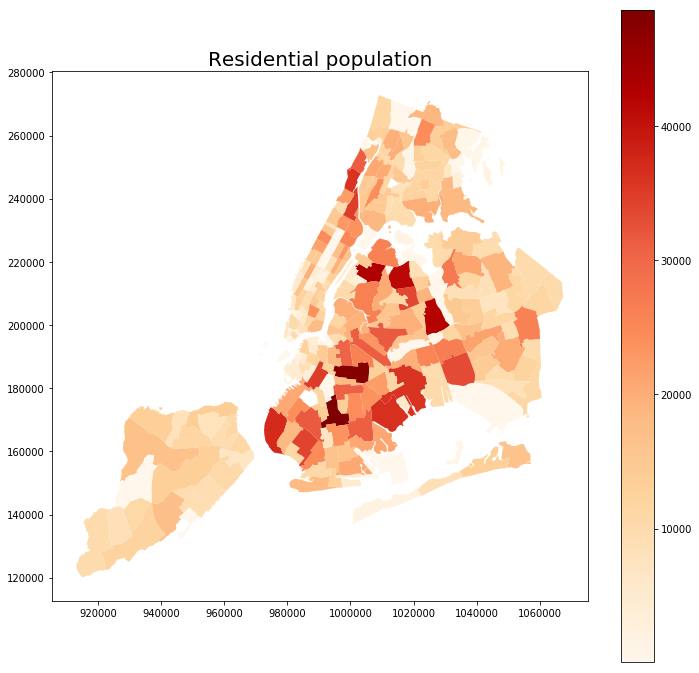

In [69]:
#color the taxi zones based on the value of Residential Plot
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title("Residential population", fontsize=20)
tsz.plot(axes=ax, column='ResidentialPop', legend=True, cmap='OrRd')

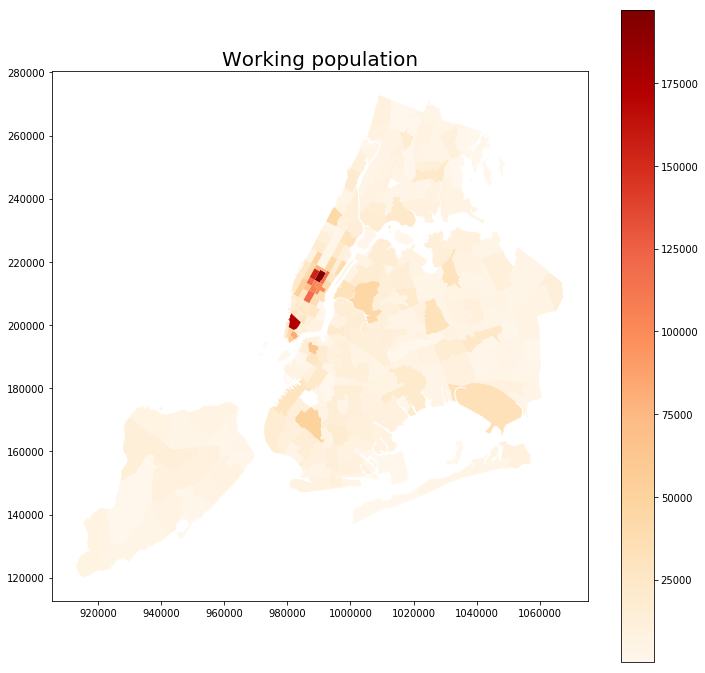

In [74]:
#now color the taxi zones based on the value of WorkingPop
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title('Working population', fontsize=20)
tsz.plot(axes=ax, column='WorkingPop', legend=True, cmap='OrRd')

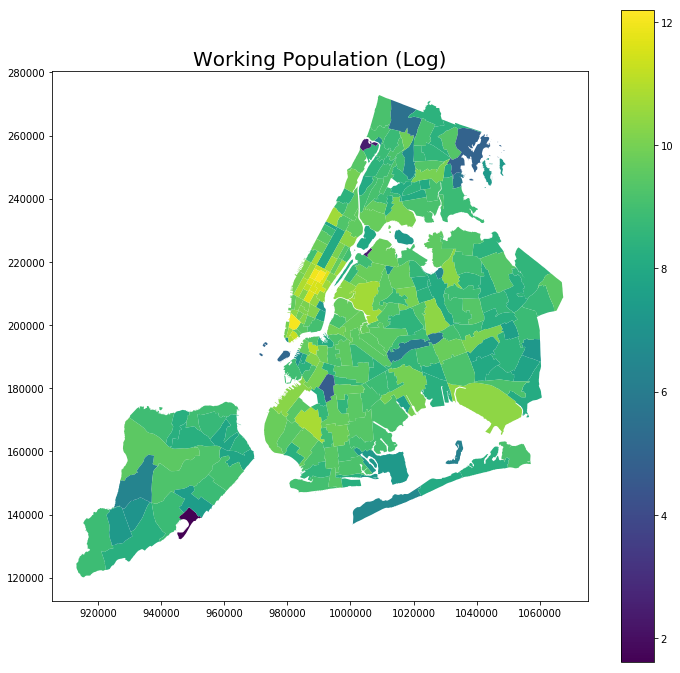

In [78]:
#as values vary widely try log-scale
tsz['LogWorkingPop']=np.log(tsz.WorkingPop)
f, ax = plt.subplots(1, figsize=(12,12))
ax.set_title("Working Population (Log)", fontsize=20)
tsz.plot(axes=ax, column='LogWorkingPop', legend=True)

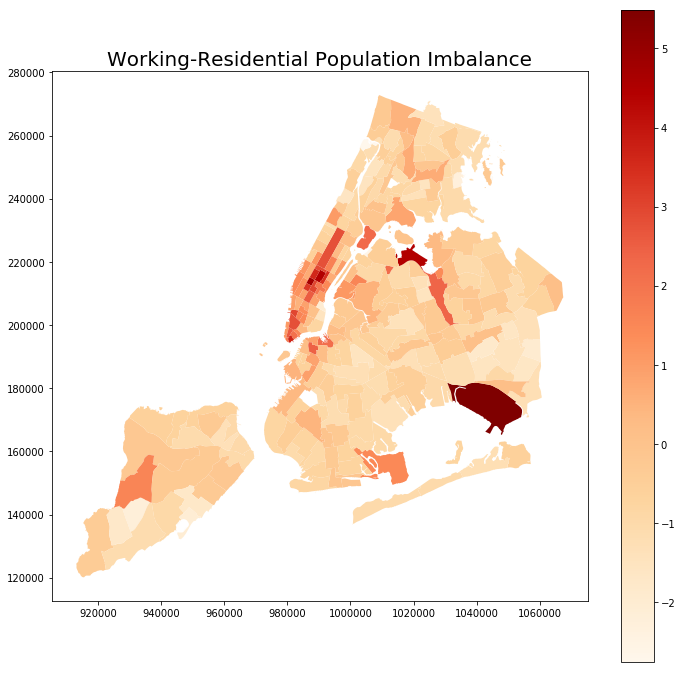

In [83]:
#Task1 visualizing imbalance between working and residential population
tsz['WorkingResidentialRatio']=np.log(tsz.WorkingPop/tsz.ResidentialPop)
f, ax= plt.subplots(1, figsize=(12, 12))
ax.set_title("Working-Residential Population Imbalance", fontsize=20)
tsz.plot(axes=ax, column='WorkingResidentialRatio', legend=True, cmap='OrRd')

In [84]:
tsz['ResidentialDens']=np.log(tsz.ResidentialPop/tsz.Shape_Area)
tsz['WorkingDens']=np.log(tsz.WorkingPop/tsz.Shape_Area)
tsz.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,ResidentialPop,WorkingPop,LogWorkingPop,WorkingResidentialRatio,ResidentialDens,WorkingDens
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,...",11398.0,4989.0,8.514991,-0.826202,17.405993,16.579790
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,...",12318.0,2717.0,7.907284,-1.511533,18.516973,17.005439
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ...",10751.0,1191.0,7.082549,-2.200205,16.887750,14.687544
5,6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,"POLYGON ((966568.7466657609 158679.854687795, ...",6729.0,2495.0,7.822044,-0.992138,16.222052,15.229914
6,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.217962816 218919.6406951398,...",43048.0,17223.0,9.754001,-0.916070,18.519979,17.603909


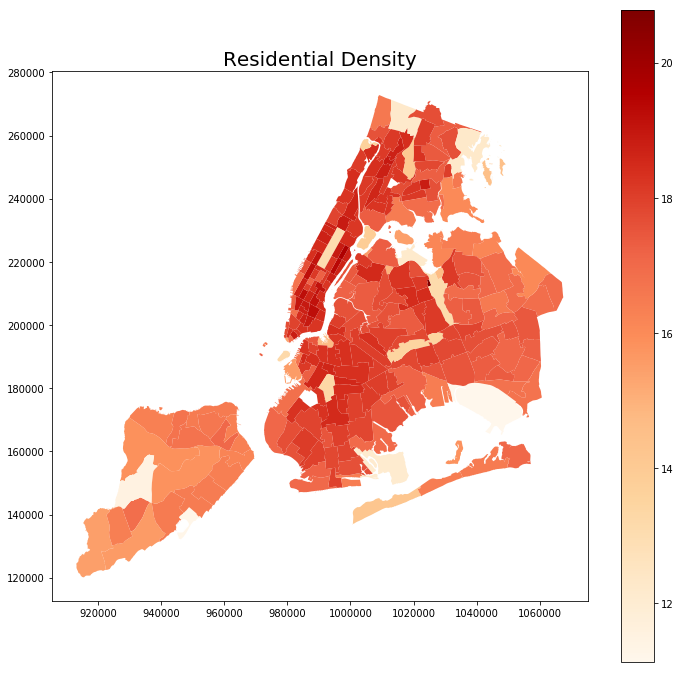

In [85]:
f, ax=plt.subplots(1, figsize=(12, 12))
ax.set_title("Residential Density", fontsize=20)
tsz.plot(axes=ax, column='ResidentialDens', legend=True, cmap='OrRd')

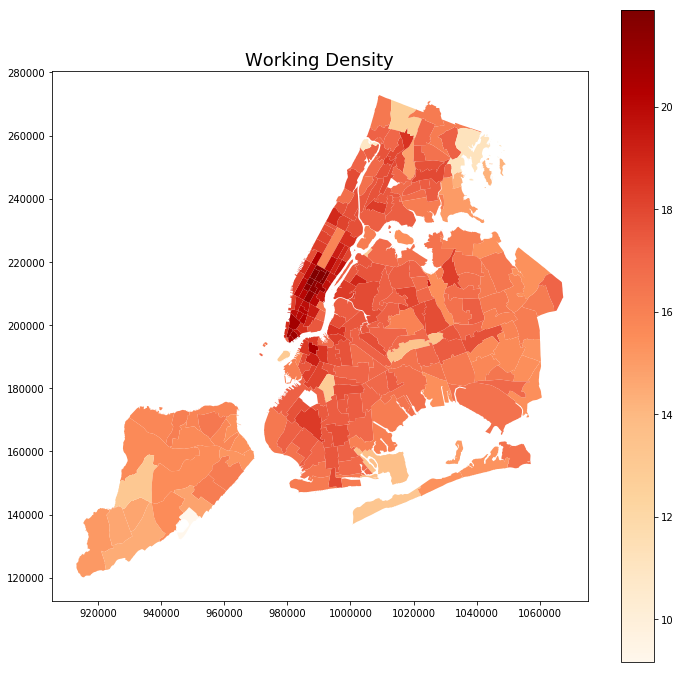

In [86]:
#now color the taxi zones based on the value of ResidentialPop
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title("Working Density", fontsize=18)
tsz.plot(axes=ax, column='WorkingDens', legend = True, cmap='OrRd')

In [87]:
tsz.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,ResidentialPop,WorkingPop,LogWorkingPop,WorkingResidentialRatio,ResidentialDens,WorkingDens
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,...",11398.0,4989.0,8.514991,-0.826202,17.405993,16.579790
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,...",12318.0,2717.0,7.907284,-1.511533,18.516973,17.005439
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ...",10751.0,1191.0,7.082549,-2.200205,16.887750,14.687544
5,6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,"POLYGON ((966568.7466657609 158679.854687795, ...",6729.0,2495.0,7.822044,-0.992138,16.222052,15.229914
6,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.217962816 218919.6406951398,...",43048.0,17223.0,9.754001,-0.916070,18.519979,17.603909


In [88]:
tsz['MaleWorkPop']=tsz.LocationID.map({tz:LEHDW.male[tz] for tz in Pdata.index})
tsz['FemaleWorkPop']=tsz.LocationID.map({tz: LEHDW.female[tz] for tz in Pdata.index})
tsz['GenderWorkforceImbalance']=np.log(tsz.MaleWorkPop/tsz.FemaleWorkPop)

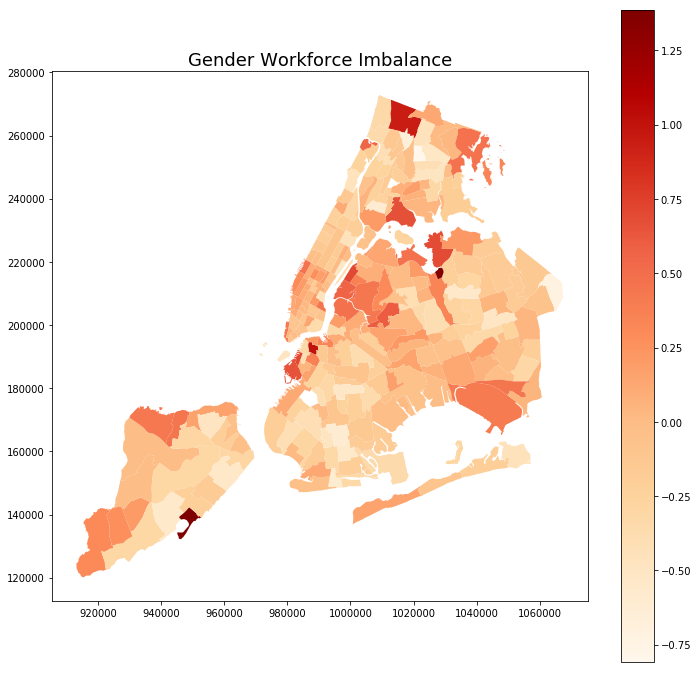

In [90]:
#now color the taxi zones based on the value of ResidentialPop
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title("Gender Workforce Imbalance", fontsize=18)
tsz.plot(axes=ax, column='GenderWorkforceImbalance', legend = True, cmap='OrRd')